## Notebook for Performing Exploratory Data Analysis, Feature Engineering, and Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [3]:
item_categories = pd.read_csv("data/item_categories.csv")
items = pd.read_csv("data/items.csv")
shops = pd.read_csv("data/shops.csv")

In [4]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
item_categories.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


Observations:
- There are 84 different categories.
- Each category has a name.

In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


Observations:

- The number of different unique items present are 22170.
- Name for each item. Particular item_category_id for each item as well.

In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
shops.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


Observations:

- Shop_id from 0 to 59. Unique name for each shop. *Can we derive any important information from the name of the shop?*

In [10]:
sales = pd.read_csv("data/sales_train_v2.csv")
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


### Interpretation:

- **Date_block_num** is an encoding for the successive months starting from 0 for Jan 2013 and 33 for Oct 2015
- Minimum value of item_price < 0 and looking at the values between 75% and max, there is a difference of 3 orders of magnitude. Therefore, need to check for outliers.
- The same holds for item_cnt_day, the difference between 75% and max is unusually high.
- Majority of transactions are small (B2C), however there are some B2B transactions. For B2C transactions, it might be useful to categorize items based on price.

In [12]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

Need to convert date into suitable format for subsequent use.

In [13]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

In [14]:
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

### Outlier Processing

Items with prices less than 0

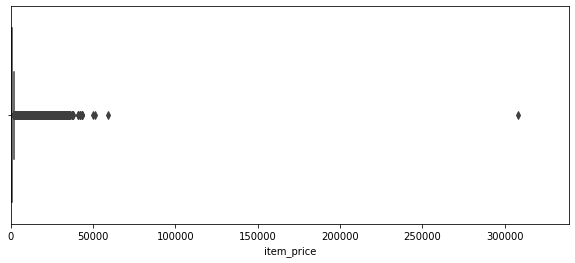

In [15]:
import seaborn as sns

plt.figure(figsize=(10,4))
plt.xlim(sales.item_price.min(), sales.item_price.max()*1.1)
sns.boxplot(x=sales.item_price)

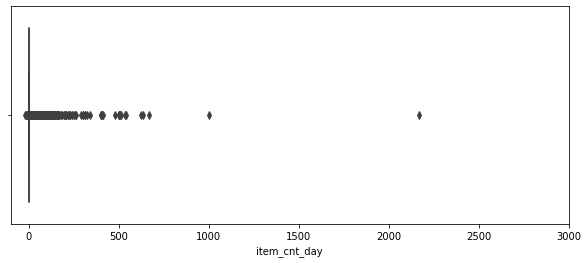

In [16]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=sales.item_cnt_day)

In [17]:
sales = sales[sales['item_price']<100000]
sales = sales[sales['item_cnt_day']<1001]

In [18]:
sales[sales['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [19]:
sales[(sales['shop_id'] == 32) & (sales['item_id']==2973) & (sales['date_block_num'] == 4)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484682,2013-05-23,4,32,2973,1249.0,1.0
484683,2013-05-15,4,32,2973,-1.0,1.0
484684,2013-05-06,4,32,2973,2499.0,1.0


Replacing the -ve value with a median.

In [20]:
m = sales[(sales['shop_id']==32) & (sales['item_id'] == 2973) & (sales['date_block_num'] == 4) & (sales['item_price']>0)]['item_price'].median()

In [21]:
sales.loc[sales['item_price']<0,'item_price'] = m

### Adding Month

In [22]:
sales['month'] = sales['date'].dt.month

Since the predictions are required to be made for the monthly sales, we can drop the column of date.

In [23]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-01-02,0,59,22154,999.00,1.0,1
1,2013-01-03,0,25,2552,899.00,1.0,1
2,2013-01-05,0,25,2552,899.00,-1.0,1
3,2013-01-06,0,25,2554,1709.05,1.0,1
4,2013-01-15,0,25,2555,1099.00,1.0,1


### Test Data

In [24]:
test = pd.read_csv("data/test.csv")
test.shape

(214200, 3)

In [25]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [26]:
len(test.groupby("shop_id").groups.keys())

42

In [27]:
d = test.groupby("shop_id").groups
d.keys()

dict_keys([2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59])

In [28]:
test['item_id'].nunique()

5100

In [29]:
5100*42

214200

In the test set, for the test month, we need to make predictions for every possible combination of shop_id and item_id for that month, therefore we should prepare our train dataset in that fashion in order to get better results.

In [30]:
test['date_block_num'] = 34
test['month'] = 11
test.head()

,ID,shop_id,item_id,date_block_num,month
0,0,5,5037,34,11
1,1,5,5320,34,11
2,2,5,5233,34,11
3,3,5,5232,34,11
4,4,5,5268,34,11


In [31]:
test.drop("ID",axis = 1,inplace = True)

In [32]:
test.head()

,shop_id,item_id,date_block_num,month
0,5,5037,34,11
1,5,5320,34,11
2,5,5233,34,11
3,5,5232,34,11
4,5,5268,34,11


In [33]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-01-02,0,59,22154,999.00,1.0,1
1,2013-01-03,0,25,2552,899.00,1.0,1
2,2013-01-05,0,25,2552,899.00,-1.0,1
3,2013-01-06,0,25,2554,1709.05,1.0,1
4,2013-01-15,0,25,2555,1099.00,1.0,1


Forming the train dataset by adding new entries (combinations).

In [34]:
sales.drop("date",axis = 1,inplace = True)

In [35]:
ts = time.time()
empty_df = []
for i in range(34):
    cons = sales[sales['date_block_num']==i]
    iu = cons['item_id'].unique()
    su = cons['shop_id'].unique()
    for j in su:
        for k in iu:
            empty_df.append([i,j,k])
time.time()-ts

9.390410661697388

In [36]:
ts = time.time()
df = pd.DataFrame(empty_df,columns = ['date_block_num','shop_id','item_id'])
df.describe()
time.time() - ts

13.082056522369385

In [37]:
df.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [38]:
df['month'] = (df['date_block_num']%12)+1

In [39]:
test[['shop_id','item_id']] = test[['item_id','shop_id']]
test.columns = ['item_id','shop_id','date_block_num','month']
test.head()

,item_id,shop_id,date_block_num,month
0,5037,5,34,11
1,5320,5,34,11
2,5233,5,34,11
3,5232,5,34,11
4,5268,5,34,11


In [40]:
df[['item_id','date_block_num']] = df[['date_block_num','item_id']]

In [41]:
df.columns = ['item_id','shop_id','date_block_num','month']
df.head()

,item_id,shop_id,date_block_num,month
0,22154,59,0,1
1,2552,59,0,1
2,2554,59,0,1
3,2555,59,0,1
4,2564,59,0,1


In [42]:
df.shape

(10913804, 4)

### EDA plotting

In [27]:
gb = sales.groupby("shop_id")["item_id"].count()

Text(0, 0.5, 'Item_id count')

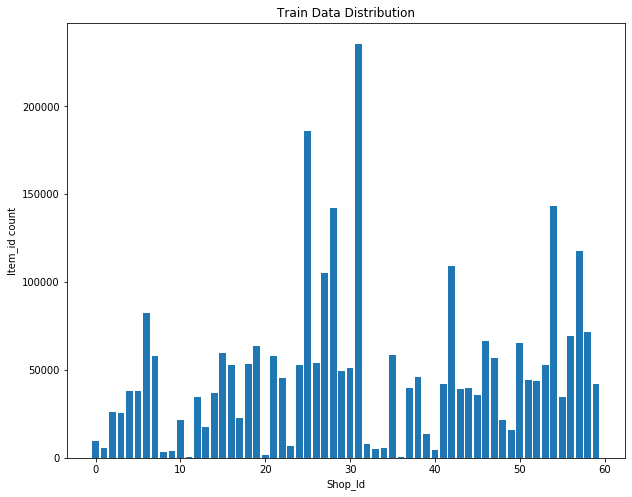

In [28]:
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(gb.index,gb.values)
ax.set_title("Train Data Distribution")
ax.set_xlabel("Shop_Id")
ax.set_ylabel("Item_id count")

Text(0, 0.5, 'Item_id count')

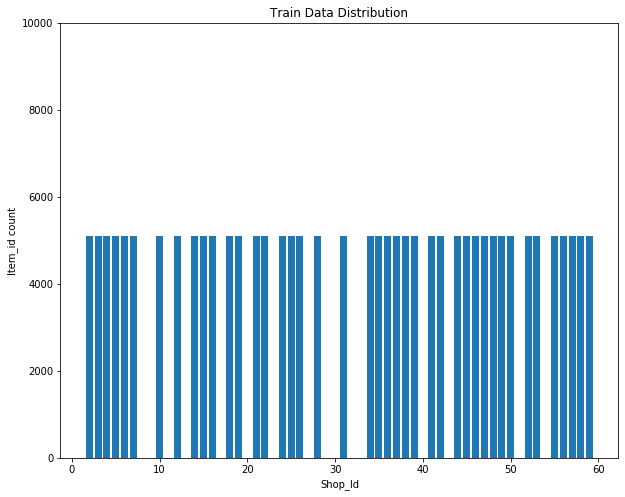

In [29]:
gb = test.groupby("shop_id")["item_id"].count()
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(gb.index,gb.values)
ax.set_title("Train Data Distribution")
ax.set_xlabel("Shop_Id")
ax.set_ylim(0,10000)
ax.set_ylabel("Item_id count")

Observations

- We need to predict the sales for 42 out of 60 shops for particular items. 5100 for each.
- There are shops where the unique items sold are less than 5100, thus we need to predict for items which haven't been sold in that shop earlier.

**Converting Russian Names to English and extracting features out of it**

In [43]:
symbols=(u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ", u"abvgdeejzijklmnoprstufhzcss_y_euaABVGDEEJZIJKLMNOPRSTUFHZCSS_Y_EUA")
english = {ord(a):ord(b) for a, b in zip(*symbols)}
item_categories['items_english'] = item_categories['item_category_name'].apply(lambda x: x.translate(english))
print(item_categories.items_english.head(30))

0              PC - Garnitury/Nausniki
1                     Aksessuary - PS2
2                     Aksessuary - PS3
3                     Aksessuary - PS4
4                     Aksessuary - PSP
5                  Aksessuary - PSVita
6                Aksessuary - XBOX 360
7                Aksessuary - XBOX ONE
8                       Bilety (Zifra)
9                      Dostavka tovara
10               Igrovye konsoli - PS2
11               Igrovye konsoli - PS3
12               Igrovye konsoli - PS4
13               Igrovye konsoli - PSP
14            Igrovye konsoli - PSVita
15          Igrovye konsoli - XBOX 360
16          Igrovye konsoli - XBOX ONE
17            Igrovye konsoli - Procie
18                          Igry - PS2
19                          Igry - PS3
20                          Igry - PS4
21                          Igry - PSP
22                       Igry - PSVita
23                     Igry - XBOX 360
24                     Igry - XBOX ONE
25           Igry - Akses

- Within a particular category, there are other sub-categories namely, the version of PS, XBOX (in other words, the console used, programs, etc. We'd split the meta-categoried by "-".

In [44]:
item_categories["meta_category"]=item_categories.items_english.apply(lambda x:x.split(" - ")[0])
print(item_categories.meta_category.head(20))

0                  PC
1          Aksessuary
2          Aksessuary
3          Aksessuary
4          Aksessuary
5          Aksessuary
6          Aksessuary
7          Aksessuary
8      Bilety (Zifra)
9     Dostavka tovara
10    Igrovye konsoli
11    Igrovye konsoli
12    Igrovye konsoli
13    Igrovye konsoli
14    Igrovye konsoli
15    Igrovye konsoli
16    Igrovye konsoli
17    Igrovye konsoli
18               Igry
19               Igry
Name: meta_category, dtype: object


In [45]:
print(item_categories.meta_category.unique())
print(item_categories.meta_category.nunique())
# 20 meta-categories

['PC' 'Aksessuary' 'Bilety (Zifra)' 'Dostavka tovara' 'Igrovye konsoli'
 'Igry' 'Igry Android' 'Igry MAC' 'Igry PC'
 'Karty oplaty (Kino, Muzyka, Igry)' 'Karty oplaty' 'Kino' 'Knigi'
 'Muzyka' 'Podarki' 'Programmy' 'Slujebnye' 'Cistye nositeli (spil_)'
 'Cistye nositeli (stucnye)' 'Elementy pitania']
20


In [46]:
shops['shops_english'] = shops['shop_name'].apply(lambda x: x.translate(english))
print(shops.shops_english.head(100))

0                       !Akutsk Ordjonikidze, 56 fran
1                       !Akutsk TZ "Zentral_nyj" fran
2                                    Adygea TZ "Mega"
3                      Balasiha TRK "Oktabr_-Kinomir"
4                            Voljskij TZ "Volga Moll"
5                              Vologda TRZ "Marmelad"
6                          Voronej (Plehanovskaa, 13)
7                              Voronej TRZ "Maksimir"
8                        Voronej TRZ Siti-Park "Grad"
9                                   Vyezdnaa Torgovla
10                         Jukovskij ul. Ckalova 39m?
11                         Jukovskij ul. Ckalova 39m²
12                                Internet-magazin CS
13                                Kazan_ TZ "Behetle"
14                            Kazan_ TZ "ParkHaus" II
15                               Kaluga TRZ "XXI vek"
16                                   Kolomna TZ "Rio"
17                      Krasnoarsk TZ "Vzletka Plaza"
18                          

The first name indeed signifies the city to which the shop belongs. Can be included in the dataframe.

In [47]:
shops["town"]=shops.shops_english.apply(lambda x:x.split()[0])
print(shops.town)
print(shops.town.unique())
print(len(shops.town.unique()))

0              !Akutsk
1              !Akutsk
2               Adygea
3             Balasiha
4             Voljskij
5              Vologda
6              Voronej
7              Voronej
8              Voronej
9             Vyezdnaa
10           Jukovskij
11           Jukovskij
12    Internet-magazin
13              Kazan_
14              Kazan_
15              Kaluga
16             Kolomna
17          Krasnoarsk
18          Krasnoarsk
19               Kursk
20              Moskva
21              Moskva
22              Moskva
23              Moskva
24              Moskva
25              Moskva
26              Moskva
27              Moskva
28              Moskva
29              Moskva
30              Moskva
31              Moskva
32              Moskva
33              Mytisi
34          N.Novgorod
35          N.Novgorod
36         Novosibirsk
37         Novosibirsk
38                Omsk
39        RostovNaDonu
40        RostovNaDonu
41        RostovNaDonu
42                 SPb
43         

In [25]:
shops.to_csv('final_shops.csv',index=False)

Saving the modified dataframe as "final_shops.csv"

In [48]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [49]:
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [50]:
shops.head()
#shops.drop("shop_name",axis = 1,inplace = True)
#shops.drop("shops_english",axis = 1,inplace = True)

,shop_name,shop_id,shops_english,town
0,"!Якутск Орджоникидзе, 56 фран",0,"!Akutsk Ordjonikidze, 56 fran",!Akutsk
1,"!Якутск ТЦ ""Центральный"" фран",1,"!Akutsk TZ ""Zentral_nyj"" fran",!Akutsk
2,"Адыгея ТЦ ""Мега""",2,"Adygea TZ ""Mega""",Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balasiha TRK ""Oktabr_-Kinomir""",Balasiha
4,"Волжский ТЦ ""Волга Молл""",4,"Voljskij TZ ""Volga Moll""",Voljskij


Including the label as a column.

In [52]:
gb = sales.groupby(["date_block_num","shop_id","item_id"]).agg({"item_cnt_day":["sum"]})
gb.columns = ['item_cnt_month']
gb.reset_index(inplace = True)
gb.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [53]:
df = pd.merge(df, gb, on=['date_block_num','shop_id','item_id'], how='left')
df['item_cnt_month'] = (df['item_cnt_month'].fillna(0).clip(0,20))

In [55]:
df.head(10)

,item_id,shop_id,date_block_num,month,item_cnt_month
0,22154,59,0,1,1.0
1,2552,59,0,1,0.0
2,2554,59,0,1,0.0
3,2555,59,0,1,0.0
4,2564,59,0,1,0.0
5,2565,59,0,1,0.0
6,2572,59,0,1,0.0
7,2573,59,0,1,0.0
8,2574,59,0,1,2.0
9,2593,59,0,1,0.0


In [56]:
test.head()

,item_id,shop_id,date_block_num,month
0,5037,5,34,11
1,5320,5,34,11
2,5233,5,34,11
3,5232,5,34,11
4,5268,5,34,11


In [57]:
ts = time.time()
df = pd.concat([df, test], ignore_index=True, sort=False, keys=['item_id','shop_id','date_block_num','month'])
df.fillna(0, inplace=True) # 34 month
time.time() - ts

7.685763120651245

In [58]:
df.head()

,item_id,shop_id,date_block_num,month,item_cnt_month
0,22154,59,0,1,1.0
1,2552,59,0,1,0.0
2,2554,59,0,1,0.0
3,2555,59,0,1,0.0
4,2564,59,0,1,0.0


Keeping only the English names and dropping the original Russian entries.

In [60]:
shops.head()
shops.drop("shop_name",axis = 1,inplace = True)
shops.drop("shops_english",axis = 1,inplace = True)

In [61]:
df = pd.merge(df,shops,how = "left",on = "shop_id")
df.head()

,item_id,shop_id,date_block_num,month,item_cnt_month,town
0,22154,59,0,1,1.0,Aroslavl_
1,2552,59,0,1,0.0,Aroslavl_
2,2554,59,0,1,0.0,Aroslavl_
3,2555,59,0,1,0.0,Aroslavl_
4,2564,59,0,1,0.0,Aroslavl_


In [62]:
items.head()
items.drop("item_name",axis = 1,inplace = True)

In [63]:
item_categories.head()

,item_category_name,item_category_id,items_english,meta_category
0,PC - Гарнитуры/Наушники,0,PC - Garnitury/Nausniki,PC
1,Аксессуары - PS2,1,Aksessuary - PS2,Aksessuary
2,Аксессуары - PS3,2,Aksessuary - PS3,Aksessuary
3,Аксессуары - PS4,3,Aksessuary - PS4,Aksessuary
4,Аксессуары - PSP,4,Aksessuary - PSP,Aksessuary


In [ ]:
df = pd.merge(df,items,how = "left",on = "item_id")
df.head()

In [43]:
df.dtypes

item_id               int64
shop_id               int64
date_block_num        int64
month                 int64
item_cnt_month      float64
town                 object
item_category_id      int64
dtype: object

In [44]:
item_categories.drop("item_category_name",axis = 1,inplace = True)
item_categories.drop("items_english",axis = 1,inplace = True)
df = pd.merge(df,item_categories,how = "left",on = "item_category_id")
df.head()

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category
0,22154,59,0,1,1.0,Aroslavl_,37,Kino
1,2552,59,0,1,0.0,Aroslavl_,58,Muzyka
2,2554,59,0,1,0.0,Aroslavl_,58,Muzyka
3,2555,59,0,1,0.0,Aroslavl_,56,Muzyka
4,2564,59,0,1,0.0,Aroslavl_,59,Muzyka


In [45]:
df.to_csv("combined.csv",index = False)

In [2]:
df = pd.read_csv("combined.csv")

In [3]:
df.head()
df.drop("item_cnt_month_lag_1",axis = 1,inplace = True)
df.drop("item_cnt_month_lag_2",axis = 1,inplace = True)
df.drop("item_cnt_month_lag_3",axis = 1,inplace = True)

In [4]:
df.to_csv("combined.csv",index = False)

### Observations:

- Shops 10 and 11 have nearly the same name. Check whether shop 10 is empty for date_block_num = 25.
- Similar case for 39 and 40 as well.

In [5]:
df[(df.shop_id == 10) & (df['date_block_num'] == 25)]

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category,year


In [6]:
df[(df["shop_id"]==11) & (df["date_block_num"]==25)]

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category,year
8971244,21443,11,25,2,0.0,Jukovskij,37,Kino,2015
8971245,20949,11,25,2,20.0,Jukovskij,71,Podarki,2015
8971246,21455,11,25,2,0.0,Jukovskij,37,Kino,2015
8971247,20299,11,25,2,0.0,Jukovskij,37,Kino,2015
8971248,21562,11,25,2,0.0,Jukovskij,55,Muzyka,2015
...,...,...,...,...,...,...,...,...,...
8977292,9993,11,25,2,0.0,Jukovskij,40,Kino,2015
8977293,18893,11,25,2,0.0,Jukovskij,37,Kino,2015
8977294,19064,11,25,2,0.0,Jukovskij,37,Kino,2015
8977295,14671,11,25,2,0.0,Jukovskij,58,Muzyka,2015


In [7]:
df[(df["shop_id"]==10) | (df["shop_id"]==11)].groupby(["shop_id","date_block_num"]).sum()

item_id   month  item_cnt_month  item_category_id  \
shop_id date_block_num                                                       
10      0               92300281    8115           935.0            363756   
        1               92288656   16336          1016.0            366208   
        2               94657675   24906           987.0            373349   
        3               93534207   32580           756.0            366800   
        4               94309036   41695           667.0            372909   
        5               95947737   50868           733.0            380132   
        6               95312177   58835           775.0            377758   
        7               91434009   64248           713.0            359203   
        8               88817250   70884           907.0            352700   
        9               92974392   80390           938.0            363521   
        10              91869716   88979           955.0            364380   
        11              95335403  101676          1258.0            382284   
        12              85665787    7551           733.0            336528   
        13              81117948   14268           815.0            320158   
        14              81350453   21426           849.0            319078   
        15              77242223   27096           572.0            302287   
        16              76866252   33425           672.0            295414   
        17              76291177   40086           572.0            297080   
        18              75521979   46277           539.0            293846   
        19              72204480   50904           613.0            281505   
        20              67031166   54639           672.0            270018   
        21              72139052   63340           589.0            287134   
        22              69914793   69542           717.0            282473   
        23              73884569   79260          1010.0            300690   
        24              68131796    6139           583.0            274360   
        26              68909964   18246           541.0            273124   
        27              60827786   21904           501.0            245619   
        28              59296751   26415           429.0            237141   
        29              58550010   31296           441.0            235233   
        30              59406882   37261           434.0            241442   
        31              57121564   40864           442.0            232055   
        32              56463880   45765           502.0            233600   
        33              60625752   54130           428.0            254344   
        34              56198933   56100             0.0            236179   
11      25              67941782   12106           546.0            272901   

                            year  
shop_id date_block_num            
10      0               16335495  
        1               16442184  
        2               16711926  
        3               16395885  
        4               16786407  
        5               17066214  
        6               16919265  
        7               16166403  
        8               15854388  
        9               16182507  
        10              16283157  
        11              17056149  
        12              15207714  
        13              14367876  
        14              14383988  
        15              13642836  
        16              13463590  
        17              13455534  
        18              13314554  
        19              12815082  
        20              12226994  
        21              12756676  
        22              12732508  
        23              13302470  
        24              12370085  
        26              12255230  
        27              11034140  
        28              10645245  
        29              10510240  
        30              10725845  
        31        

In [8]:
df.loc[df['shop_id']==11,"shop_id"]=10

In [9]:
df[df.shop_id == 11]

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category,year


In [10]:
df[(df['shop_id'] == 39) | (df['shop_id']==40)].groupby(["shop_id","date_block_num"]).sum()

item_id  month  item_cnt_month  item_category_id  \
shop_id date_block_num                                                      
39      14              81350453  21426           785.0            319078   
        15              77242223  27096           608.0            302287   
        16              76866252  33425           767.0            295414   
        17              76291177  40086           668.0            297080   
        18              75521979  46277           639.0            293846   
        19              72204480  50904           728.0            281505   
        20              67031166  54639           633.0            270018   
        21              72139052  63340           585.0            287134   
        22              69914793  69542           840.0            282473   
        23              73884569  79260          1271.0            300690   
        24              68131796   6139           808.0            274360   
        25              67941782  12106           691.0            272901   
        26              68909964  18246           799.0            273124   
        27              60827786  21904           622.0            245619   
        28              59296751  26415           706.0            237141   
        29              58550010  31296           593.0            235233   
        30              59406882  37261           598.0            241442   
        31              57121564  40864           813.0            232055   
        32              56463880  45765           790.0            233600   
        33              60625752  54130           836.0            254344   
        34              56198933  56100             0.0            236179   
40      14              81350453  21426           451.0            319078   
        15              77242223  27096           299.0            302287   
        16              76866252  33425           291.0            295414   
        17              76291177  40086           304.0            297080   
        18              75521979  46277           330.0            293846   
        19              72204480  50904           325.0            281505   
        20              67031166  54639           345.0            270018   
        21              72139052  63340           400.0            287134   
        22              69914793  69542           451.0            282473   
        23              73884569  79260           874.0            300690   
        24              68131796   6139           421.0            274360   

                            year  
shop_id date_block_num            
39      14              14383988  
        15              13642836  
        16              13463590  
        17              13455534  
        18              13314554  
        19              12815082  
        20              12226994  
        21              12756676  
        22              12732508  
        23              13302470  
        24              12370085  
        25              12196795  
        26              12255230  
        27              11034140  
        28              10645245  
        29              10510240  
        30              10725845  
        31              10292620  
        32              10246275  
        33              10907195  
        34              10276500  
40      14              14383988  
        15              13642836  
        16              13463590  
        17              13455534  
        18              13314554  
        19              12815082  
        20              12226994  
        21              12756676  
        22              12732508  
        23              13302470  
        24              12370085

Seems to be separate, and not correlated.

A dip in sales for the months in 2015, high inflation? Add year as a feature as we're predicting for Nov 2015.

In [11]:
df['year'] = (df['date_block_num']//12+2013)
df.head()

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category,year
0,22154,59,0,1,1.0,Aroslavl_,37,Kino,2013
1,2552,59,0,1,0.0,Aroslavl_,58,Muzyka,2013
2,2554,59,0,1,0.0,Aroslavl_,58,Muzyka,2013
3,2555,59,0,1,0.0,Aroslavl_,56,Muzyka,2013
4,2564,59,0,1,0.0,Aroslavl_,59,Muzyka,2013


Let's try some **Lag Based Features**

In [12]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [5]:
ts = time.time()
df = lag_feature(df, [1,2,3], 'item_cnt_month')
time.time() - ts

79.80479168891907

In [6]:
df.to_csv("combined.csv",index = False)

### Mean Encoded Features

In [13]:
ts = time.time()
group = df.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['date_block_num'], how='left')
df['date_avg_item_cnt'] = df['date_avg_item_cnt'].astype(np.float16)
df = lag_feature(df, [1], 'date_avg_item_cnt')
df.drop(['date_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

14.23878026008606

In [18]:
ts = time.time()
group = df.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['date_block_num','item_category_id'], how='left')
df['date_cat_avg_item_cnt'] = df['date_cat_avg_item_cnt'].astype(np.float16)
df = lag_feature(df, [1], 'date_cat_avg_item_cnt')
df.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

33.29758405685425

In [19]:
ts = time.time()
group = df.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
df['date_shop_cat_avg_item_cnt'] = df['date_shop_cat_avg_item_cnt'].astype(np.float16)
df = lag_feature(df, [1], 'date_shop_cat_avg_item_cnt')
df.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

23.745437145233154

In [20]:
df.to_csv("combined.csv",index = False)

In [4]:
df = pd.read_csv("combined.csv")

In [5]:
df.head()

,item_id,shop_id,date_block_num,month,item_cnt_month,town,item_category_id,meta_category,year,date_avg_item_cnt_lag_1,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1
0,22154,59,0,1,1.0,Aroslavl_,37,Kino,2013,NaN,NaN,NaN
1,2552,59,0,1,0.0,Aroslavl_,58,Muzyka,2013,NaN,NaN,NaN
2,2554,59,0,1,0.0,Aroslavl_,58,Muzyka,2013,NaN,NaN,NaN
3,2555,59,0,1,0.0,Aroslavl_,56,Muzyka,2013,NaN,NaN,NaN
4,2564,59,0,1,0.0,Aroslavl_,59,Muzyka,2013,NaN,NaN,NaN


In [7]:
ts = time.time()
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)         
    return df

matrix = fill_na(df)
time.time() - ts

0.9163305759429932

In [8]:
df.shape

(11128004, 12)

In [10]:
df.dtypes

item_id                               int64
shop_id                               int64
date_block_num                        int64
month                                 int64
item_cnt_month                      float64
town                                 object
item_category_id                      int64
meta_category                        object
year                                  int64
date_avg_item_cnt_lag_1             float64
date_cat_avg_item_cnt_lag_1         float64
date_shop_cat_avg_item_cnt_lag_1    float64
dtype: object

In [11]:
import pickle

In [12]:
df.to_pickle("data.pkl")
del df
import gc
gc.collect()

426